# Summary
Adding time-til-death and age


In [1]:
import os
# make sure we're in the correct directory
os.chdir('/Users/davidharar/Documents/School/thesis/downstream_classification')


In [24]:
import pandas as pd
pd.set_option('display.max_columns', None)

metadata = pd.read_csv('./data/combined_data/metadata_only_existant_readings.csv', index_col=0)

metadata.iloc[:4]

,sample,reading,dates,one_year_until_death,CVA,first_AF_in_home_ECG,first_AF_in_Dispatch,AF,IHD,sp_MI_all,sp_CABG,CHF,sp_CPR,cpr_shl,DM2,AF2,DM
0,train,427805,20/01/2008,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,train,356921,23/02/2010,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,train,428248,19/12/2015,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,train,440621,18/08/2017,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### General properties of the metadata-with-dates file

In [25]:
_ = pd.read_csv('./data/combined_data/meta_data_w_Customer_CustID.csv',index_col=0)
print('shape', _.shape)
print('Types: ', type(_['names'][0]), type(metadata['reading'][0]))
print('shared columns:', [x for x in metadata.columns if x in _.columns])
print('merging results:')
display(metadata.merge(_,
               left_on='reading',
               right_on='names',
               how='outer',
               indicator=True)['_merge'].value_counts())
print('Is name uniquely identified:', _['names'].value_counts().value_counts())

shape (455974, 34)
Types:  <class 'numpy.int64'> <class 'numpy.int64'>
shared columns: ['dates', 'CVA', 'first_AF_in_home_ECG', 'first_AF_in_Dispatch', 'AF', 'IHD', 'CHF', 'cpr_shl', 'DM']
merging results:


_merge
both          371307
right_only     84667
left_only       5121
Name: count, dtype: int64

Is name uniquely identified: count
1    455974
Name: count, dtype: int64


### Looking at Dates

In [16]:
_ = _[['names', 'last_known_date', 'assumed_dead', 'approximate_death', 'test_group', 'Patient ID', 'dates', 'Customer_BirthDate', 'Age_at_start']]
print('shared columns:', [x for x in metadata.columns if x in _.columns])
__ = metadata.merge(_,
               left_on='reading',
               right_on='names',
               how='inner')
__[[x for x in __.columns if 'dates' in x]]

shared columns: ['dates']


,dates_x,dates_y
0,20/01/2008,20/01/2008
1,23/02/2010,23/02/2010
2,19/12/2015,19/12/2015
3,18/08/2017,18/08/2017
4,10/07/2019,10/07/2019
...,...,...
371302,01/04/2001,01/04/2001
371303,23/04/2012,23/04/2012
371304,03/09/2012,03/09/2012
371305,10/09/2000,10/09/2000


### Dissagreemants in regards to `dates`

In [26]:
__[(__['dates_x'] != __['dates_y']) & (pd.notna(__['dates_x']))][[x for x in __.columns if 'dates' in x]]

,dates_x,dates_y


### How many examples are lost in the merge

In [27]:
__ = metadata.merge(_,
               left_on='reading',
               right_on='names',
               how='outer',
               indicator=True)

display(pd.crosstab(__['sample'],__['_merge'], dropna=False))
display(pd.crosstab(__['sample'],__['_merge'], dropna=False, normalize='index'))


_merge,left_only,right_only,both
sample,,,
test,2389,0,55451
train,2211,0,262598
validation,521,0,53258


_merge,left_only,right_only,both
sample,,,
test,0.041304,0.0,0.958696
train,0.008349,0.0,0.991651
validation,0.009688,0.0,0.990312


# Merge and Save

In [30]:
import pandas as pd
# load dates
_ = pd.read_csv('./data/combined_data/meta_data_w_Customer_CustID.csv',index_col=0)
_ = _[['names', 'last_known_date', 'assumed_dead', 'approximate_death', 'test_group', 'Patient ID', 'Customer_BirthDate', 'Age_at_start']]

metadata = pd.read_csv('./data/combined_data/metadata_only_existant_readings.csv', index_col=0)
metadata = metadata.merge(_,
                          left_on='reading',
                          right_on='names',
                          how='inner').drop(['names'],axis=1)
metadata.iloc[:5]

,sample,reading,dates,one_year_until_death,CVA,first_AF_in_home_ECG,first_AF_in_Dispatch,AF,IHD,sp_MI_all,sp_CABG,CHF,sp_CPR,cpr_shl,DM2,AF2,DM,last_known_date,assumed_dead,approximate_death,test_group,Patient ID,Customer_BirthDate,Age_at_start
0,train,427805,20/01/2008,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3/3/2022,0.0,NaN,canceled,9476623.0,8/16/28,70.0
1,train,356921,23/02/2010,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4/1/2019,1.0,4/1/2019,dead,69592780.0,1/1/27,82.0
2,train,428248,19/12/2015,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4/13/2022,0.0,NaN,active,247147.0,3/19/25,65.0
3,train,440621,18/08/2017,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6/28/2021,0.0,NaN,canceled,77799815.0,7/30/40,74.0
4,train,32229,10/07/2019,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4/13/2022,0.0,NaN,active,42983130.0,1/8/46,70.0


In [29]:
metadata['sample'].value_counts(normalize=True)

sample
train         0.707226
test          0.149340
validation    0.143434
Name: proportion, dtype: float64

# Calculate Time Until Death

In [41]:
metadata['dates_datetime'] = pd.to_datetime(metadata['dates'])
metadata['approximate_death_datetime'] = pd.to_datetime(metadata['approximate_death'])
metadata['time_until_approximate_death'] = metadata['approximate_death_datetime'] - metadata['dates_datetime']

metadata[['dates', 'approximate_death', 'dates_datetime', 'approximate_death_datetime', 'time_until_approximate_death', 'one_year_until_death']][pd.notna(metadata['approximate_death']) & pd.notna(metadata['dates'])].sort_values('time_until_approximate_death')


/var/folders/t5/rmhnhv8d39v2fgyk_bv5fx7h0000gn/T/ipykernel_32965/606111608.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  metadata['dates_datetime'] = pd.to_datetime(metadata['dates'])


,dates,approximate_death,dates_datetime,approximate_death_datetime,time_until_approximate_death,one_year_until_death
263482,20/11/2019,2/6/2000,2019-11-20,2000-02-06,-7227 days,0
273608,21/05/2019,2/6/2000,2019-05-21,2000-02-06,-7044 days,0
314256,21/05/2019,2/6/2000,2019-05-21,2000-02-06,-7044 days,0
303004,01/05/2019,2/6/2000,2019-05-01,2000-02-06,-7024 days,0
305919,12/03/2019,2/6/2000,2019-03-12,2000-02-06,-6974 days,0
...,...,...,...,...,...,...
313995,27/05/2000,4/11/2022,2000-05-27,2022-04-11,7989 days,0
35433,07/04/2000,3/31/2022,2000-04-07,2022-03-31,8028 days,0
242342,10/11/1999,2/28/2022,1999-11-10,2022-02-28,8146 days,0
145027,16/10/1999,3/31/2022,1999-10-16,2022-03-31,8202 days,0


In [42]:
metadata[['dates', 'approximate_death', 'dates_datetime', 'approximate_death_datetime', 'time_until_approximate_death', 'one_year_until_death']][metadata['one_year_until_death'] == 1].sort_values('time_until_approximate_death')


,dates,approximate_death,dates_datetime,approximate_death_datetime,time_until_approximate_death,one_year_until_death
131793,05/01/2016,1/14/2007,2016-01-05,2007-01-14,-3278 days,1
194150,21/06/2015,1/14/2007,2015-06-21,2007-01-14,-3080 days,1
91386,20/06/2015,1/14/2007,2015-06-20,2007-01-14,-3079 days,1
40463,09/02/2016,8/19/2009,2016-02-09,2009-08-19,-2365 days,1
269729,21/04/2018,7/3/2013,2018-04-21,2013-07-03,-1753 days,1
...,...,...,...,...,...,...
353286,31/10/2004,3/10/2022,2004-10-31,2022-03-10,6339 days,1
123627,04/08/2004,1/19/2022,2004-08-04,2022-01-19,6377 days,1
318257,12/09/2004,3/10/2022,2004-09-12,2022-03-10,6388 days,1
337517,12/09/2004,3/10/2022,2004-09-12,2022-03-10,6388 days,1


<Axes: >

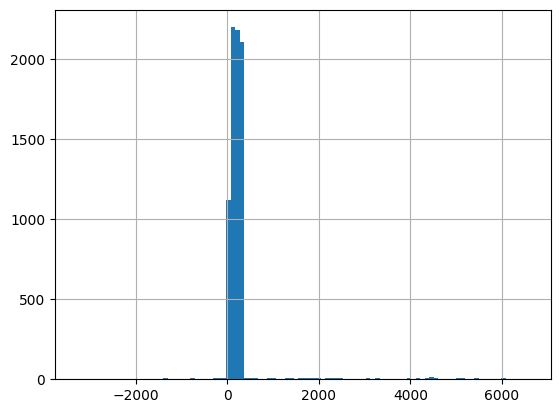

In [53]:
import seaborn as sns
mask = (metadata['one_year_until_death'] == 1)
# sns.histplot(data = metadata[mask], x='time_until_approximate_death')
# metadata[['dates', 'approximate_death', 'dates_datetime', 'approximate_death_datetime', 'time_until_approximate_death', 'one_year_until_death']][metadata['one_year_until_death'] == 1]
metadata[mask]['time_until_approximate_death'].dt.days.hist(bins=100)

In [54]:
metadata[mask]['time_until_approximate_death'].dt.days.describe()

count    7962.000000
mean      289.439965
std       652.423810
min     -3278.000000
25%       110.000000
50%       198.000000
75%       288.000000
max      6579.000000
Name: time_until_approximate_death, dtype: float64

In [55]:
(metadata[mask]['time_until_approximate_death'].dt.days<365).value_counts()

time_until_approximate_death
True     7662
False     300
Name: count, dtype: int64

In [60]:
pd.crosstab((metadata['time_until_approximate_death'].dt.days<365)&(metadata['time_until_approximate_death'].dt.days>0),
            metadata['one_year_until_death'])

one_year_until_death,0,1
time_until_approximate_death,,
False,360510,366
True,2835,7596


In [57]:
pd.crosstab((metadata['time_until_approximate_death'].dt.days<365),
            metadata['one_year_until_death'],normalize=True)

one_year_until_death,0,1
time_until_approximate_death,,
False,0.970057,0.000808
True,0.008500,0.020635


In [59]:
mask = metadata['sample'] == 'train'
pd.crosstab((metadata[mask]['time_until_approximate_death'].dt.days<365),
            metadata[mask]['one_year_until_death'],normalize=True)

one_year_until_death,0,1
time_until_approximate_death,,
False,0.969493,0.000758
True,0.009082,0.020667


### Fixing `one_year_until_death`
- set `one_year_until_death` = 0 for the negative cases  
- update the additional 3k to 1.

In [66]:
print('negative time until approx death:')
display((metadata['time_until_approximate_death'].dt.days<0).value_counts())
metadata['one_year_until_death'][(metadata['time_until_approximate_death'].dt.days<0)] = 0
metadata['one_year_until_death'][(metadata['time_until_approximate_death'].dt.days<0)]

negative time until approx death:


time_until_approximate_death
False    370926
True        381
Name: count, dtype: int64

/var/folders/t5/rmhnhv8d39v2fgyk_bv5fx7h0000gn/T/ipykernel_32965/4119754940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['one_year_until_death'][(metadata['time_until_approximate_death'].dt.days<0)] = 0


160       0
459       0
666       0
1113      0
1654      0
         ..
359536    0
359541    0
365962    0
367425    0
369084    0
Name: one_year_until_death, Length: 381, dtype: int64

In [75]:
print('Wrongly classified as 0:')
display(metadata['one_year_until_death'][((metadata['time_until_approximate_death'].dt.days<=365) & (metadata['time_until_approximate_death'].dt.days>0))].value_counts())
metadata['one_year_until_death'][((metadata['time_until_approximate_death'].dt.days<=365) & (metadata['time_until_approximate_death'].dt.days>0))] = 1

print('After')
display(metadata['one_year_until_death'][((metadata['time_until_approximate_death'].dt.days<=365) & (metadata['time_until_approximate_death'].dt.days>0))].value_counts())


Wrongly classified as 0:


one_year_until_death
1    7610
0    2841
Name: count, dtype: int64

After


/var/folders/t5/rmhnhv8d39v2fgyk_bv5fx7h0000gn/T/ipykernel_32965/4071657658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['one_year_until_death'][((metadata['time_until_approximate_death'].dt.days<=365) & (metadata['time_until_approximate_death'].dt.days>0))] = 1


one_year_until_death
1    10451
Name: count, dtype: int64

In [77]:
metadata['days_until_approximate_death'] = metadata['time_until_approximate_death'].dt.days

# Age
Since most of the years are of 19-something, we need to fix that before using `time-delta`.

In [101]:
import numpy as np
_ = pd.Series([int(str(x).split('/')[-1]) if str(x).split('/')[-1]!='nan' else np.nan for x in metadata['Customer_BirthDate']])
(_<21).value_counts(normalize=True)

False    0.954232
True     0.045768
Name: proportion, dtype: float64

In [102]:
_[_<22].value_counts()

21.0    6305
20.0    4507
19.0    2869
18.0    2030
14.0    1459
16.0    1210
15.0    1184
17.0    1111
12.0     717
13.0     645
11.0     428
10.0     254
9.0      162
1.0      106
8.0       93
6.0       89
7.0       76
4.0       21
3.0       17
5.0       10
2.0        4
0.0        2
Name: count, dtype: int64

It seems that all of them were born in 1900-something, therefore I add it.

In [126]:
metadata['Customer_BirthDate_1900'] = ['/'.join(str(x).split('/')[:-1])+'/19'+str(x).split('/')[-1] if x!=np.nan else np.nan for x in metadata['Customer_BirthDate']]
metadata['Customer_BirthDate_1900'][pd.isna(metadata['Customer_BirthDate'])] = None
metadata[['Customer_BirthDate','Customer_BirthDate_1900']][pd.isna(metadata['Customer_BirthDate'])]


/var/folders/t5/rmhnhv8d39v2fgyk_bv5fx7h0000gn/T/ipykernel_32965/2255826145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['Customer_BirthDate_1900'][pd.isna(metadata['Customer_BirthDate'])] = None


,Customer_BirthDate,Customer_BirthDate_1900
1818,NaN,None
2282,NaN,None
2404,NaN,None
3790,NaN,None
4365,NaN,None
...,...,...
366300,NaN,None
369045,NaN,None
370369,NaN,None
370428,NaN,None


In [128]:
metadata['Customer_BirthDate_datetime'] = pd.to_datetime(metadata['Customer_BirthDate_1900'], format="%d/%M/%Y")
metadata[['dates_datetime', 'Customer_BirthDate_datetime','Customer_BirthDate']]

,dates_datetime,Customer_BirthDate_datetime,Customer_BirthDate
0,2008-01-20,1928-01-08 00:16:00,8/16/28
1,2010-02-23,1927-01-01 00:01:00,1/1/27
2,2015-12-19,1925-01-03 00:19:00,3/19/25
3,2017-08-18,1940-01-07 00:30:00,7/30/40
4,2019-07-10,1946-01-01 00:08:00,1/8/46
...,...,...,...
371302,2001-04-01,1926-01-10 00:18:00,10/18/26
371303,2012-04-23,1960-01-10 00:20:00,10/20/60
371304,2012-09-03,1952-01-06 00:21:00,6/21/52
371305,2000-09-10,1936-01-01 00:01:00,1/1/36


In [134]:
metadata['age_days'] = (metadata['dates_datetime'] - metadata['Customer_BirthDate_datetime']).dt.days
metadata.iloc[:4]


,sample,reading,dates,one_year_until_death,CVA,first_AF_in_home_ECG,first_AF_in_Dispatch,AF,IHD,sp_MI_all,sp_CABG,CHF,sp_CPR,cpr_shl,DM2,AF2,DM,last_known_date,assumed_dead,approximate_death,test_group,Patient ID,Customer_BirthDate,Age_at_start,dates_datetime,approximate_death_datetime,time_until_approximate_death,days_until_approximate_death,Customer_BirthDate_datetime,Customer_BirthDate_1900,age_days
0,train,427805,20/01/2008,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3/3/2022,0.0,NaN,canceled,9476623.0,8/16/28,70.0,2008-01-20,NaT,NaT,NaN,1928-01-08 00:16:00,8/16/1928,29231.0
1,train,356921,23/02/2010,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4/1/2019,1.0,4/1/2019,dead,69592780.0,1/1/27,82.0,2010-02-23,2019-04-01,3324 days,3324.0,1927-01-01 00:01:00,1/1/1927,30368.0
2,train,428248,19/12/2015,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4/13/2022,0.0,NaN,active,247147.0,3/19/25,65.0,2015-12-19,NaT,NaT,NaN,1925-01-03 00:19:00,3/19/1925,33221.0
3,train,440621,18/08/2017,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6/28/2021,0.0,NaN,canceled,77799815.0,7/30/40,74.0,2017-08-18,NaT,NaT,NaN,1940-01-07 00:30:00,7/30/1940,28347.0


# Save

In [136]:
# metadata.to_csv('./data/combined_data/metadata_only_existant_readings_09042023.csv')
